# 
CS228 Python Tutorial¶
Adapted by Volodymyr Kuleshov and Isaac Caswell from the CS231n Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).
Introduction
Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.
We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.
Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).
In this tutorial, we will cover:
Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
Matplotlib: Plotting, Subplots, Images
IPython: Creating notebooks, Typical workflows
Basics of Python
Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) / 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print quicksort([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]


In [2]:
import numpy as np


Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.
We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [3]:

a = np.array([1, 2, 3])  # Create a rank 1 array
print type(a), a.shape, a[0], a[1], a[2]
a[0] = 5                 # Change an element of the array
print a            

<type 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [4]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b

[[1 2 3]
 [4 5 6]]


In [5]:

print b.shape                   
print b[0, 0], b[0, 1], b[1, 0]


(2, 3)
1 2 4


In [51]:
%%latex 
a = np.zeros((2,2,3,2))  # Create an array of all zeros
print a

<IPython.core.display.Latex object>

In [14]:
a.shape

(2, 2, 3, 2)

In [16]:
b = np.ones((1,2))   # Create an array of all ones
print b

[[ 1.  1.]]


In [52]:
%%latex 
c = np.full((2,2,2,2), 7) # Create a constant array
print c

<IPython.core.display.Latex object>

# Array indexing
Numpy offers several ways to index into arrays.
Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [26]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b


[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.


In [29]:

print a[0, 1]  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1] 

2
77


In [48]:
%install_ext https://raw.githubusercontent.com/SiggyF/notebooks/master/pep8_magic.py
q=np.ones((2,2,2))
p=q[0,0,1]
print p

ERROR:root:Line magic function `%install_ext` not found.


1.0


In [32]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [33]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [34]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [36]:

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print a[[0, 1, 2], [0, 1, 0]]

# The above example of integer array indexing is equivalent to this:
print np.array([a[0, 0], a[1, 1], a[2, 0]])

[1 4 5]
[1 4 5]


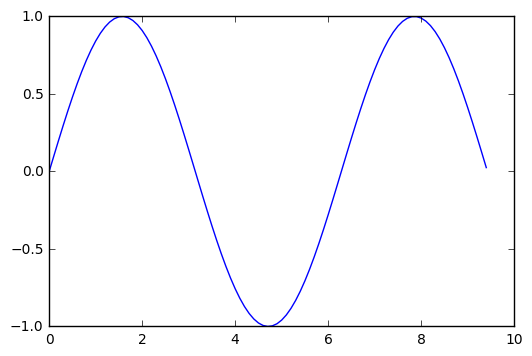

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
#By running this special iPython command, we will be displaying plots inline:

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

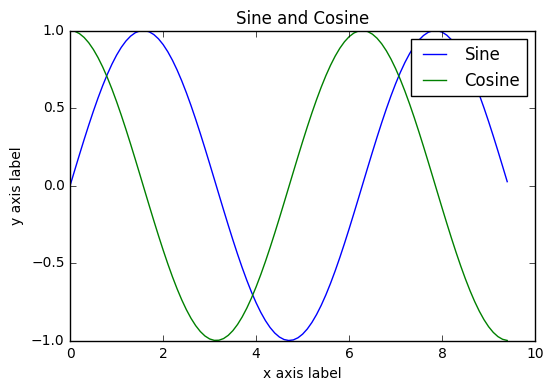

In [42]:

y_cos = np.cos(x)
y_sin=np.sin(x)
# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

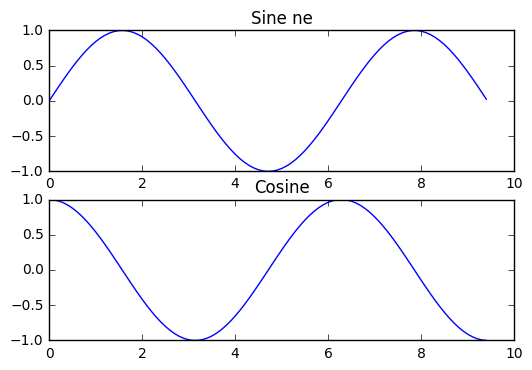

In [47]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')
plt.title('Sine ne')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

In [49]:
#https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

In [53]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

You can use % to start a single-line expression to run with the magics command. Or you can use a double %% to run a multi-line expression.

